A tutorial using Keras 

In [20]:
#Feed Foward Network
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf

batch_size = 128
num_classes = 10
epochs = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

with tf.device('/gpu:0'): # force gpu
#with tf.device('/cpu:0'): # force cpu
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)

keras.backend.clear_session()
del model
del history

print('Test loss:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [=======================

In [8]:
#with tf.device('/gpu:0'): # force gpu
with tf.device('/cpu:0'): # force cpu
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0263 - acc: 0.9925 - val_loss: 0.0825 - val_acc: 0.9843
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0226 - acc: 0.9937 - val_loss: 0.0991 - val_acc: 0.9818
Epoch 3/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0243 - acc: 0.9931 - val_loss: 0.1088 - val_acc: 0.9808
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0230 - acc: 0.9933 - val_loss: 0.0986 - val_acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0216 - acc: 0.9944 - val_loss: 0.1029 - val_acc: 0.9817
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0219 - acc: 0.9940 - val_loss: 0.0977 - val_acc: 0.9834
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0190 - acc: 0.9950 - val_loss: 0.1071 - val_acc

In [9]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6774978861265772612, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3157432729
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3668343257880056300
 physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [10]:
# CNN
import numpy as np
np.random.seed(123)  # for reproducibility
import tensorflow as tf
tf.set_random_seed(123)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

batch_size = 128

# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# 6. Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# 7. Define model architecture
model = Sequential()

model.add(Convolution2D(32, (6, 6), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(20, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 9. Fit model on training data
model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=10, verbose=1,
          validation_data=(X_test, Y_test))
model.save('model.h5')
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.2451 - acc: 0.9241 - val_loss: 0.0481 - val_acc: 0.9839
Epoch 2/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0772 - acc: 0.9768 - val_loss: 0.0361 - val_acc: 0.9884
Epoch 3/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0558 - acc: 0.9830 - val_loss: 0.0304 - val_acc: 0.9900
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0459 - acc: 0.9861 - val_loss: 0.0260 - val_acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0393 - acc: 0.9879 - val_loss: 0.0275 - val_acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0350 - acc: 0.9892 - val_loss: 0.0243 - val_acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0319 - acc: 0.9895 - val_loss: 0.0261 - val_ac

In [1]:
#https://www.datacamp.com/community/tutorials/deep-learning-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406573755&utm_loc_interest_ms=&utm_loc_physical_ms=9026924&gclid=Cj0KCQjws5HlBRDIARIsAOomqA21LGaHU8LGVDFlsk4bLonYEPaTeChOfIwuIvt30d3taVOzYiMbClAaAs-ZEALw_wcB

import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [2]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# First rows of `red` 
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Last rows of `white`
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
# Take a sample of 5 rows of `red`
red.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
514,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7
444,5.3,0.570,0.01,1.7,0.054,5.0,27.0,0.99340,3.57,0.84,12.5,7
147,7.6,0.490,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3,5
1573,6.0,0.580,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6


In [8]:
# Describe `white`
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
# Double check for null values in `red`
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
%matplotlib inline

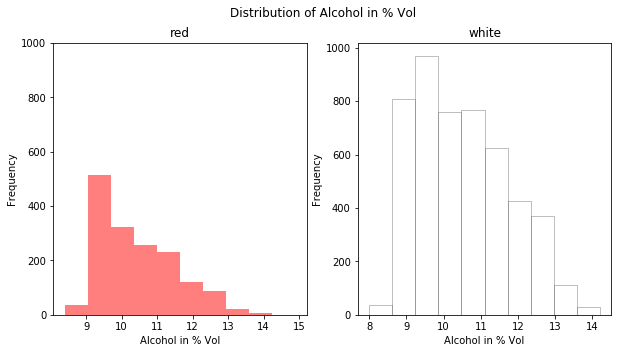

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize = (10,5))

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="White wine")

#fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[0].set_title('red')
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
ax[1].set_title('white')
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

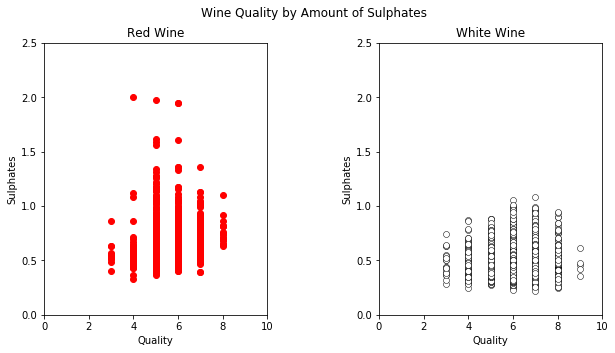

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

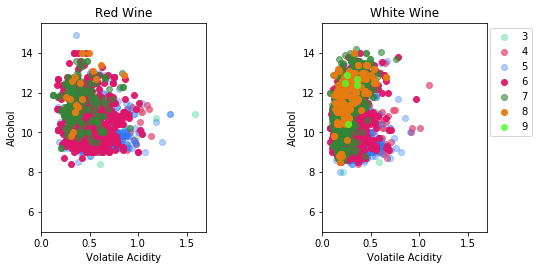

In [17]:
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)

for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

In [18]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

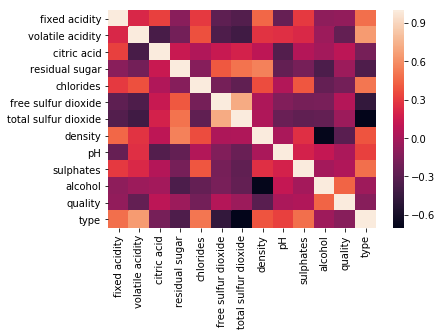

In [20]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [25]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
cols = list(wines)
cols.remove('type')
x = wines[cols]

# Specify the target labels and flatten the array 
y=wines.type

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [27]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [28]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.2896654 ,  0.01695609, -0.1637314 , -0.4055706 , -0.1897687 ,
          0.05104744, -0.4755298 ,  0.04375035,  0.149944  ,  0.18585712,
          0.04605234,  0.4203161 ],
        [ 0.09246093, -0.00486219,  0.15394145, -0.3556453 ,  0.37075537,
         -0.09201503,  0.22433394,  0.49172276,  0.02939814, -0.00528288,
         -0.28554958, -0.29101855],
        [ 0.13772285,  0.10540932, -0.16185051, -0.13713309, -0.30931568,
          0.2913708 ,  0.22610158, -0.03789827,  0.03900152, -0.13670495,
          0.02206749,  0.07224816],
        [ 0.12972063, -0.46136355, -0.1358273 , -0.03706533,  0.21573442,
          0.21198452, -0.02762926, -0.19320443,  0.24703926, -0.4224128 ,
          0.29690397, -0.07473344],
        [-0.06937274,  0.13956004, -0.04767117,  0.03820831,  0.27192348,
         -0.47782913, -0.09866273, -0.42932004, -0.04532751, -0.17295876,
         -0.3432657 ,  0.4816057 ],
        [ 0.06270897,  0.10312521,  0.34606183, -0.12457022, -0.16116223,
      

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
with tf.device('/gpu:0'): # force gpu
    model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
4352/4352 [==============================] - 14s 3ms/step - loss: 0.0901 - acc: 0.9692
Epoch 2/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0221 - acc: 0.9959
Epoch 3/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0195 - acc: 0.9966
Epoch 4/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0166 - acc: 0.9970
Epoch 5/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0152 - acc: 0.9975
Epoch 6/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0140 - acc: 0.9972
Epoch 7/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0133 - acc: 0.9972
Epoch 8/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0148 - acc: 0.9972
Epoch 9/20
4352/4352 [==============================] - 13s 3ms/step - loss: 0.0123 - acc: 0.9975
Epoch 10/20
4352/4352 [==============================] - 13s 3ms/step 

In [45]:
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int)

In [46]:
print(y_pred[:5])
print(y_test[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]
3103    0
1419    1
4761    0
4690    0
4032    0
Name: type, dtype: int64


In [47]:
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 42us/step
[0.028474554568788283, 0.9944055944055944]


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[1588,    0],
       [ 216,  341]], dtype=int64)

In [ ]:
def cross_columns(cols, df):
    ''' Function to get the cross product columns
    
    Inputs
    cols : a list of lists, the inner lists are the columns to be used to generate each cross product
    df: the dataframe used
    
    Outputs
    the dataframe of the cross products
    '''
    pass

In [56]:
def wide_network(train_X, test_X, train_Y, test_Y, cross_features=None, 
                 method='wide', batch_size=128, epocs=10, model_save=False):
    ''' Function to build a wide network (or the wide part of a wide and deep network)
    
    Inputs:
    
    train_X, test_X, train_Y, test_Y, the data and target for training and testing
    
    cross_features: the added features from the cross product transformations
    
    method: accepts 'wide' or 'wide-and-deep'
            if 'wide' only run the wide model and do all of the fitting and stuff
            if 'wide-and-deep' don't do the fitting, only return the Sequential() for use in the wide-and-deep
            
    batch_size: the batch size used for deep.fit()
    
    epocs: the number of epocs used for deep.fit()
    
    '''
    
    if cross_features:
        # concat the original features along with the cross features. Maybe should make sure they have the same number of instances
        train_X = np.hstack(train_X, cross_features)
    
    # build the model
    wide = Sequential()
    wide.add(Dense(3, input_dim=train_X.shape[1]))
    
    if method == 'wide-and-deep':
        # we are finished
        return wide
    
    if method == 'wide':
        # build and test the model
        wide.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        
        wide.fit(train_X, train_Y,
              batch_size=batch_size, epochs=epocs, verbose=1,
              validation_data=(test_X, test_Y))
        
        if model_save:
            # save the model
            wide.save('models/wide_{}.h5'.format(time.strftime("%Y_%m_%d-%H_%M_%S"))) # save dated backup
            wide.save('models/wide.h5') # save a general (overwritten) backup for easier loading later
        
        # score the model
        score = wide.evaluate(test_X, test_Y, verbose=1)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        
        # return the model and the score
        return(wide, score)

In [63]:
import time

def deep_network(train_X, test_X, train_Y, test_Y, 
                 n_hidden_layers=2, n_neurons=100, hidden_activations='relu', method='deep',
                 batch_size=128, epocs=10, model_save=False):
    ''' Function to build a deep network (or the deep part of a wide and deep network)
    
    Inputs: 
    
    train_X, test_X, train_Y, test_Y, the data and target for training and testing
    
    n_hidden_layers, the number of hidden layers, int
    
    n_neurons: the numbe of neurons in each hidden layers. If an int. use this number in each layer.
                If a list, use the elements of the list for the number of neurons
    
    hidden_activations: behaves the same as n_neurons
    
    method: accepts 'deep' or 'wide-and-deep'
            if 'deep', only run the deep model and do all of the fitting and stuff
            if 'wide-and-deep', don't do the fitting, only return the Sequential() for use in the wide-and-deep
    
    batch_size: batch size used for model.fit
    
    epocs: the number of epocs used in model.fit.
    
    model_save: save the model, idk how big these will be, it may be a bad idea
    
    ?? What is embedding ??
    '''
    
    if type(n_neurons) == int:
        # make a list of the int of length n_hidden_layers
        n_neurons_list = [n_neurons]*n_hidden_layers
    else:
        # user passed a list
        if len(n_neurons) != n_hidden_layers:
            print('make sure the number of hidden layers matches the lenght of the list of neurons in the neurons list')
        n_neurons_list = n_neurons
        
    if type(hidden_activations) == str:
        hidden_activations_list = [hidden_activations]*n_hidden_layers
    else:
        if len(hidden_activations) != n_hidden_layers:
            print('make sure the number of hidden layers matches the length of the list of activations in the neurons list')
        hidden_activation_list = hidden_activations
    
    # build the sequential model
    deep = Sequential()
    deep.add(Dense(input_dim=train_X.shape[1], output_dim=100, activation='relu'))
    for i in range(n_hidden_layers):
        deep.add(Dense(n_neurons_list[i], activation=hidden_activations_list[i]))
    deep.add(Dense(3, activation='sigmoid'))
    
    if method == 'deep-and-wide':
        # we are finished
        return deep
    
    if method == 'deep':
        # build and test the model
        deep.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        
        deep.fit(train_X, train_Y,
              batch_size=batch_size, epochs=epocs, verbose=1,
              validation_data=(test_X, test_Y))
        
        if model_save:
            # save the model
            deep.save('models/deep_{}.h5'.format(time.strftime("%Y_%m_%d-%H_%M_%S"))) # save dated backup
            deep.save('models/deep.h5') # save a general (overwritten) backup for easier loading later
        
        # score the model
        score = deep.evaluate(test_X, test_Y, verbose=1)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        
        # return the model and the score
        return(deep, score)

In [74]:
def wide_and_deep_network(train_X, test_X, train_Y, test_Y, cross_features=None,
                          n_hidden_layers=2, n_neurons=100, hidden_activations='relu', method='deep',
                          batch_size=128, epocs=10, model_save=False):
    ''' Function to build a wide and deep network
    
    Inputs are the same as for wide and for deep parts of code
    '''
    
    # get the deep and wide parts
    deep = deep_network(train_X, test_X, train_Y, test_Y, 
                        n_hidden_layers=n_hidden_layers, n_neurons=n_neurons, hidden_activations=hidden_activations, 
                        method='deep-and-wide', batch_size=batch_size, epocs=epocs, model_save=model_save)
    wide = wide_network(train_X, test_X, train_Y, test_Y, cross_features=cross_features, 
                        method='deep-and-wide', batch_size=batch_size, epocs=epocs, model_save=model_save)
    
    # conbine the models
    
    merged = concatenate([wide.output, deep.output])
    
    combined_model = Sequential()
    combined_model.add(Dense(3,activation='sigmoid'))
    combined_out = combined_model(merged)
   
    model = Model([wide.input, deep.input], combined_out)
    
    # build and test the model
    model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
    
    # fit the model
    model.fit(train_X, train_Y,
                batch_size=batch_size, epochs=epocs, verbose=1,
                validation_data=(test_X, test_Y))
        
    if model_save:
            # save the model
            model.save('models/deep_and_wide_{}.h5'.format(time.strftime("%Y_%m_%d-%H_%M_%S"))) # save dated backup
            model.save('models/deep_and_wide.h5') # save a general (overwritten) backup for easier loading later
        
    # score the model
    score = deep.evaluate(test_X, test_X, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

In [7]:
# get the iris data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [8]:
print('iris data shape {}'.format(X.shape))
print('iris target shape {}'.format(Y.shape))
print('1st row of data {}'.format(X[0]))
print('1st row of target {}'.format(Y[0]))

iris data shape (150, 4)
iris target shape (150,)
1st row of data [5.1 3.5 1.4 0.2]
1st row of target 0


In [44]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

xscalar = StandardScaler(copy=True)
X_scalar = xscalar.fit_transform(X)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
cat_y = to_categorical(encoded_Y)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scalar, cat_y, test_size = 0.2, stratify=Y, random_state=42)

In [75]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation

wide_network(X_train, X_test, y_train, y_test, cross_features=None, 
                 method='wide', batch_size=128, epocs=10, model_save=False)

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 1s 6ms/step - loss: 5.7181 - acc: 0.5667 - val_loss: 5.8721 - val_acc: 0.5667
Epoch 2/10
120/120 [==============================] - 0s 42us/step - loss: 5.7150 - acc: 0.5750 - val_loss: 5.8703 - val_acc: 0.5667
Epoch 3/10
120/120 [==============================] - 0s 33us/step - loss: 5.7120 - acc: 0.5667 - val_loss: 5.8686 - val_acc: 0.5667
Epoch 4/10
120/120 [==============================] - 0s 33us/step - loss: 5.7090 - acc: 0.5667 - val_loss: 5.8668 - val_acc: 0.5667
Epoch 5/10
120/120 [==============================] - 0s 42us/step - loss: 5.7060 - acc: 0.5750 - val_loss: 5.8652 - val_acc: 0.5667
Epoch 6/10
120/120 [==============================] - 0s 42us/step - loss: 5.7030 - acc: 0.5750 - val_loss: 5.8635 - val_acc: 0.5667
Epoch 7/10
120/120 [==============================] - 0s 33us/step - loss: 5.7001 - acc: 0.5750 - val_loss: 5.5002 - val_acc: 0.5667
Epoch 8/10
120/120 [=====

(<keras.engine.sequential.Sequential at 0x1d307dc8dd8>,
 [5.447118282318115, 0.5333333611488342])

In [64]:
deep_network(X_train, X_test, y_train, y_test, 
                 n_hidden_layers=2, n_neurons=100, hidden_activations='relu', method='deep',
                 batch_size=128, epocs=10, model_save=False)

C:\ProgramData\Anaconda3\envs\machine_learning_python\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="relu", units=100)`


Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 1s 5ms/step - loss: 1.1028 - acc: 0.3417 - val_loss: 1.0713 - val_acc: 0.6667
Epoch 2/10
120/120 [==============================] - 0s 50us/step - loss: 1.0776 - acc: 0.6167 - val_loss: 1.0512 - val_acc: 0.9000
Epoch 3/10
120/120 [==============================] - 0s 50us/step - loss: 1.0547 - acc: 0.7667 - val_loss: 1.0330 - val_acc: 0.8333
Epoch 4/10
120/120 [==============================] - 0s 50us/step - loss: 1.0339 - acc: 0.8583 - val_loss: 1.0159 - val_acc: 0.8000
Epoch 5/10
120/120 [==============================] - 0s 50us/step - loss: 1.0146 - acc: 0.8417 - val_loss: 0.9996 - val_acc: 0.8000
Epoch 6/10
120/120 [==============================] - 0s 58us/step - loss: 0.9963 - acc: 0.8417 - val_loss: 0.9833 - val_acc: 0.8000
Epoch 7/10
120/120 [==============================] - 0s 58us/step - loss: 0.9782 - acc: 0.8417 - val_loss: 0.9665 - val_acc: 0.8000
Epoch 8/10
120/120 [=====

(<keras.engine.sequential.Sequential at 0x1d30439b1d0>,
 [0.9122361540794373, 0.800000011920929])

In [76]:
wide_and_deep_network(X_train, X_test, y_train, y_test, cross_features=None,
                          n_hidden_layers=2, n_neurons=100, hidden_activations='relu', method='deep',
                          batch_size=128, epocs=10, model_save=False)

C:\ProgramData\Anaconda3\envs\machine_learning_python\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=4, activation="relu", units=100)`


AttributeError: 'NoneType' object has no attribute 'output'

In [ ]:
# now use the functional api. renamed functions to <>_func()
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model 

In [ ]:
def wide_network_func(train_X, test_X, train_Y, test_Y, cross_features=None, 
                      method='wide', batch_size=128, epocs=10, model_save=False):
    ''' Function to build a wide network (or the wide part of a wide and deep network)
    
    Inputs:
    
    train_X, test_X, train_Y, test_Y, the data and target for training and testing
    
    cross_features: the added features from the cross product transformations
    
    method: accepts 'wide' or 'wide-and-deep'
            if 'wide' only run the wide model and do all of the fitting and stuff
            if 'wide-and-deep' don't do the fitting, only return the Sequential() for use in the wide-and-deep
            
    batch_size: the batch size used for deep.fit()
    
    epocs: the number of epocs used for deep.fit()
    
    '''
    
    if cross_features:
        # concat the original features along with the cross features. Maybe should make sure they have the same number of instances
        train_X = np.hstack(train_X, cross_features)
    
    # build the model
    wide = Sequential()
    wide.add(Dense(3, input_dim=train_X.shape[1]))
    
    if method == 'wide-and-deep':
        # we are finished
        return wide
    
    if method == 'wide':
        # build and test the model
        wide.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        
        wide.fit(train_X, train_Y,
              batch_size=batch_size, epochs=epocs, verbose=1,
              validation_data=(test_X, test_Y))
        
        if model_save:
            # save the model
            wide.save('models/wide_{}.h5'.format(time.strftime("%Y_%m_%d-%H_%M_%S"))) # save dated backup
            wide.save('models/wide.h5') # save a general (overwritten) backup for easier loading later
        
        # score the model
        score = wide.evaluate(test_X, test_Y, verbose=1)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        
        # return the model and the score
        return(wide, score)